## Observations and Insights

## Dependencies and starter code

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID','Mouse ID'])
clinical_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [106]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [107]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [108]:
clinical_data_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [150]:
clinical_data_complete.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Tumor Response to Data

In [109]:
tumor_vols_mean = clinical_data_complete.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

#convert to data frame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

#preview data frame
tumor_vols_mean.head(100)




Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
...                                    ...
Zoniferol    25                  55.432935
             30                  57.713531
             35                  60.089372
             40                  62.916692
             45                  65.960888

[100 rows x 1 columns]

In [110]:
# Store the standard erro fo tumor volumes grouped by drug and timepoint
tumor_vols_sem = clinical_data_complete.groupby(['Drug Regimen', 'Timepoint']).sem()["Tumor Volume (mm3)"]

# Convert to Data frame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

#Print check
tumor_vols_sem.head()

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                    0.000000
             5                    0.448593
             10                   0.702684
             15                   0.838617
             20                   0.909731

In [111]:
# minor data munging to re-format data frames for plotting
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index= "Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index= "Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_pivot_mean

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [112]:
tumor_vols_pivot_sem

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


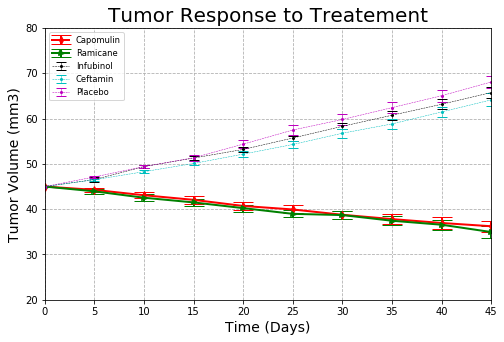

In [189]:
#generate the plot with error bars
plt.figure(figsize=(8,5))
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Capomulin'], yerr=tumor_vols_pivot_sem['Capomulin'],marker="d", color="r",markersize=5, linestyle="solid", linewidth=2.0, capsize=10)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Ramicane'], yerr=tumor_vols_pivot_sem['Ramicane'],marker=">", color="g",markersize=5, linestyle="solid", linewidth=2.0, capsize=10)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Infubinol'], yerr=tumor_vols_pivot_sem['Infubinol'],marker="o", color="k",markersize=2, linestyle="dashed", linewidth=0.5, capsize=5)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Ceftamin'], yerr=tumor_vols_pivot_sem['Naftisol'],marker="o", color="c",markersize=2, linestyle="dashed", linewidth=0.5, capsize=5)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Placebo'], yerr=tumor_vols_pivot_sem['Placebo'],marker="o", color="m",markersize=2, linestyle="dashed", linewidth=0.5, capsize=5)
#plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Propriva'], yerr=tumor_vols_pivot_sem['Propriva'],marker="X", color="y",markersize=5, linestyle="dashed", linewidth=0.5, capsize=3)

drug_names_legend = ['Capomulin', 'Ramicane','Infubinol','Ceftamin','Placebo']

plt.ylim(20,80)
plt.xlim(0,45)

plt.title("Tumor Response to Treatement", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(labels= drug_names_legend, loc="best", fontsize="small", fancybox=True)


ax.annotate('Capomulin & Ramicane signal promising results',
            xy=(30, 40), xycoords='data',
            xytext=(20, 35), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

ax.annotate('Capomulin & Ramicane signal promising results',
            xy=(20, 40), xycoords='data',
            xytext=(20, 15), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

# You may also use negative points or pixels to specify from (right, top).
# E.g., (-10, 10) is 10 points to the left of the right side of the axes and 10
# points above the bottom

ax.annotate('Capomulin & Ramicane signal promising results',
            xy=(10, 30), xycoords='axes fraction',
            xytext=(5, 25), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

ax.set(xlim=(20, 80), ylim=(0, 45))

#Capomulin & Ramicane signal promising results

#save the figure
plt.savefig("Figures/Fig1_TUM.png")

#show the figure
plt.show()



#### NOTE: Capomulin & Ramicane signal promising results

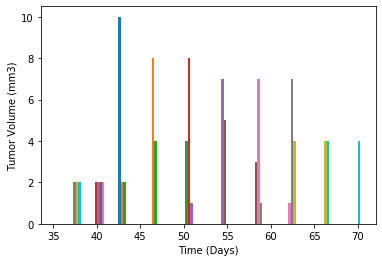

In [158]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(tumor_vols_pivot_mean)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
#print(sts.normaltest(temperatures.sample(50)))

In [159]:
#plt.figure(figsize=(8,5))
#plt.bar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Capomulin'], color="r",alpha=0.5, align="center")
#plt.bar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Ramicane'], color="r",alpha=0.5, align="center")
#plt.bar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Infubinol'], color="r",alpha=0.5, align="center")
#plt.bar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Ceftamin'], color="r",alpha=0.5, align="center")
#plt.bar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Placebo'], color="r",alpha=0.5, align="center")

#drug_names_legend = ['Capomulin', 'Ramicane','Infubinol','Ceftamin','Placebo']

# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ['Capomulin', 'Ramicane','Infubinol','Ceftamin','Placebo'])

#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max('Drug Regimen')+5000)

#plt.show()

#### NOTE: Capomulin & Ramicane signal promising results

## Metastatic Response to Treatment

#### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [114]:
# store the mean met. Site data grouped drug and timepoints.
met_sites_mean = clinical_data_complete.groupby(['Drug Regimen', 'Timepoint']).mean()['Metastatic Sites']

#convert to data frame
met_sites_mean = pd.DataFrame(met_sites_mean)

#preview data
met_sites_mean.head()




Metastatic Sites
Drug Regimen Timepoint                  
Capomulin    0                  0.000000
             5                  0.160000
             10                 0.320000
             15                 0.375000
             20                 0.652174

In [115]:
#store the standard error associated with met. sites groped by drug and timepoint.
met_sites_sem = clinical_data_complete.groupby(['Drug Regimen', 'Timepoint']).sem()['Metastatic Sites']

met_sites_sem = pd.DataFrame(met_sites_sem)

met_sites_sem.head() 



Metastatic Sites
Drug Regimen Timepoint                  
Capomulin    0                  0.000000
             5                  0.074833
             10                 0.125433
             15                 0.132048
             20                 0.161621

In [116]:
#minor data munging to reformat the data frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns = "Drug Regimen")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns = "Drug Regimen")["Metastatic Sites"]

met_sites_pivot_mean

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [117]:
met_sites_pivot_sem

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


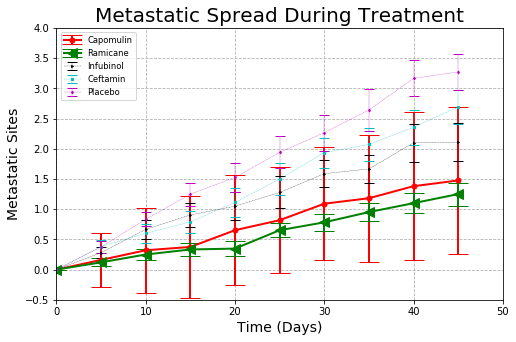

In [188]:
#generate the plot with error bars
plt.figure(figsize=(8,5))
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Capomulin'], yerr=tumor_vols_pivot_sem['Capomulin'],marker="o", color="r",markersize=5, linestyle="solid", linewidth=2.0, capsize=10)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Ramicane'], yerr=met_sites_pivot_sem['Ramicane'],marker="<", color="g",markersize=10, linestyle="solid", linewidth=2.0, capsize=10)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Infubinol'], yerr=met_sites_pivot_sem['Infubinol'],marker=">", color="k",markersize=2, linestyle="dashed", linewidth=0.3, capsize=5)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Ceftamin'], yerr=met_sites_pivot_sem['Ceftamin'],marker="s", color="c",markersize=2, linestyle="dashed", linewidth=0.3, capsize=5)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Placebo'], yerr=met_sites_pivot_sem['Placebo'],marker="d", color="m",markersize=2, linestyle="dashed", linewidth=0.3, capsize=5)
#plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean['Propriva'], yerr=met_sites_pivot_sem['Propriva'],marker="X", color="y",markersize=5, linestyle="dashed", linewidth=0.5, capsize=3)
#plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Capomulin'], yerr=tumor_vols_pivot_sem['Capomulin'],marker="o", color="r",markersize=2, linestyle="dashed", linewidth=1.0, capsize=5)



#Drugs of interest
#Capomulin
#Ramicane
#Infubinol
#Ceftamin
#Placebo


drug_names_legend = ['Capomulin', 'Ramicane','Infubinol','Ceftamin','Placebo']

plt.ylim(-0.5,4)
plt.xlim(0,50)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(labels= drug_names_legend, loc="best", fontsize="small", fancybox=True)

#save the figure
plt.savefig("Figures/Fig2_META.png")

#show the figure
plt.show()


#### Ramicane still looking good. Slightly over 1 metastatic site additions at day 45. Has a tight distribution. Capomulin is a close 2nd place, but has a rather large distribution - larger than all other drug regimens.

## Survival Rates

In [119]:
#strore the count of mice grouped by drug and timepoint
survival_count = clinical_data_complete.groupby(["Drug Regimen", "Timepoint"]).count()["Tumor Volume (mm3)"]

#convert to data frame
survival_count = pd.DataFrame({"Mouse Count" :survival_count})

#verify table
survival_count.head()

Mouse Count
Drug Regimen Timepoint             
Capomulin    0                   25
             5                   25
             10                  25
             15                  24
             20                  23

In [120]:
#minor data munging to reformat
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index= "Timepoint", columns = "Drug Regimen")["Mouse Count"]

#found this on stack overflow to try to resolve extra spaces in column headers...
#df.columns = df.columns.str.strip()

#preview the data frame
survival_count_pivot

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


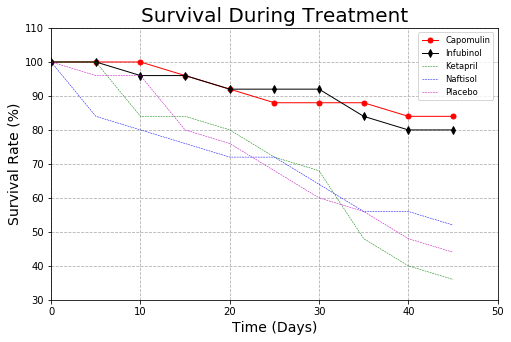

In [170]:
#generate the plot (remember percentages)
plt.figure(figsize=(8,5))
plt.plot(100 * survival_count_pivot["Capomulin"]/25, "ro", linestyle= "solid", markersize=5, linewidth=1.0)
plt.plot(100 * survival_count_pivot["Ramicane"]/25, "kd", linestyle= "solid", markersize=5, linewidth=1.0)
plt.plot(100 * survival_count_pivot["Infubinol"]/25, "g", linestyle= "dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Ceftamin"]/25, "b", linestyle= "dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Placebo"]/25, "m", linestyle= "dashed", markersize=5, linewidth=0.5)
#plt.plot(100 * survival_count_pivot["Propriva"]/25, "ro", linestyle= "dashed", markersize=5, linewidth=0.5)

#Drugs of interest
#Capomulin
#Ramicane
#Infubinol
#Ceftamin
#Placebo



plt.ylim(30,110)
plt.xlim (0,50)

drug_names_legend = ['Capomulin', 'Infubinol','Ketapril','Naftisol','Placebo','Propriva']

plt.title("Survival During Treatment", fontsize=20)
plt.ylabel("Survival Rate (%)",fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)

plt.grid(linestyle= 'dashed')

plt.legend(labels= drug_names_legend, loc= 'best', fontsize= 'small', fancybox= True)

#save the figure
plt.savefig('Figures/Fig3_PCT')

#show the figure
plt.show()


## Summary Bar Graph 

In [123]:
#calculate the percent changes for each drug
tumor_pct_change = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]

#tumor_vols_pivot_mean
#tumor_vols_pivot_mean

#display data to confirm
tumor_pct_change


Drug Regimen
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

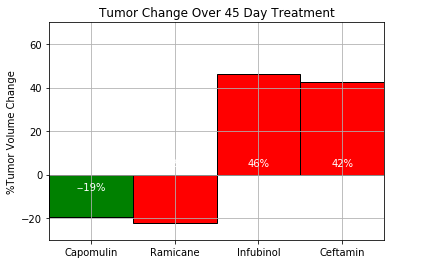

In [172]:
#store all relevant changes itnos a tuple
pct_changes = (tumor_pct_change['Capomulin'],
              tumor_pct_change['Ramicane'],
              tumor_pct_change['Infubinol'],
              tumor_pct_change['Ceftamin'],
              tumor_pct_change['Placebo'])
              #tumor_pct_change['Propriva'])


#Drugs of interest

#Capomulin
#Ramicane
#Infubinol
#Ceftamin
#Placebo

#splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width= 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green', ec= 'black')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red', ec= 'black')
                
#orient widths, add labels, tick marks etc...
ax.set_ylabel('%Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin','Ramicane','Infubinol', 'Ceftamin', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.set_xlim([-0.5, 3.5])
ax.grid(True)
                
#use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha= 'center', va= 'bottom', color= 'white')
                
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%%' % int(height),
               ha= 'center', va= 'bottom', color= 'white')
                
#call the function to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
                
plt.savefig('Figures/Fig4_SUMMARY')
                
plt.show()

In [26]:
pymac_datamerge.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [27]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [28]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

pymac_datamerge.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas




In [30]:
# Filter the DataFrame down only to those columns to chart
pymac_df = pymac_datamerge[['Tumor Volume (mm3)', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites']

# Set the index to be "State" so they will be used as labels
pymac_df = pymac_df.set_index("Age_months")

pymac_df.head()

SyntaxError: invalid syntax (<ipython-input-30-4705ca3b4900>, line 5)

In [15]:
# Use DataFrame.plot() in order to create a bar chart of the data
pymac_df.plot(kind="bar", figsize=(20,1))

# Set a title for the chart
plt.title("Data")

plt.show()
plt.tight_layout()

TypeError: no numeric data to plot

In [ ]:
#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that
#shows the number of data points for each treatment regimen.

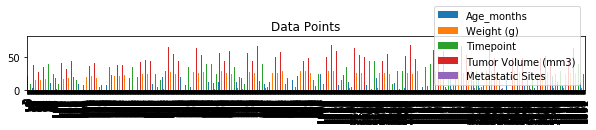

In [9]:
# Use DataFrame.plot() in order to create a bar chart of the data
pymac_datamerge.plot(kind="bar", figsize=(10,1))

# Set a title for the chart
plt.title("Data Points")

plt.show()
#plt.tight_layout()

In [10]:
# Set x axis and tick locations
x_axis = np.arange(len(pymac_datamerge))
tick_locations = [value for value in x_axis]

In [11]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

NameError: name 'rain_df' is not defined

<Figure size 1440x216 with 0 Axes>

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen